In [ ]:
# import necessary info
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,MaxPool2D,AveragePooling2D

In [ ]:
# load data
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

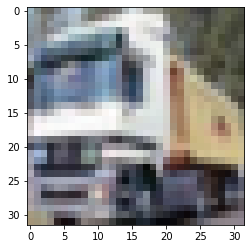

In [ ]:
# show one image from the dataset
import matplotlib.pyplot as plt
plt.imshow(X_train[1],cmap=plt.cm.binary)

In [ ]:
X_train.min()
# range is 0-255

0

In [ ]:
# I attempted the model once without normalizing the pixels, and the results were very inaccurate (~10%) - so here, I will normalize the pixel values
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
# change Y to categorical
from keras.utils import to_categorical
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)
Y_train.shape

(50000, 10)

In [ ]:
# create the CNN model
from keras.layers import Dense
model=Sequential()
model.add(Conv2D(32, (2, 2), activation = 'relu', kernel_initializer = 'he_uniform', input_shape=(32, 32, 3)))
#model.add(AveragePooling2D(2, 2))
model.add(MaxPool2D(2, 2))
model.add(Flatten())
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(250, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])
history = model.fit(X_train, Y_train, epochs = 50, validation_data = (X_test, Y_test), batch_size = 256, verbose = 1)

loss, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Test accuracy: %.3f' %acc)

loss, acc = model.evaluate(X_train, Y_train, verbose = 0)
print('Train accuracy: %.3f' %acc)

Epoch 1/50
196/196 [==============================] - 4s 15ms/step - loss: 2.0117 - categorical_accuracy: 0.2770 - val_loss: 1.9498 - val_categorical_accuracy: 0.2776
Epoch 2/50
196/196 [==============================] - 2s 11ms/step - loss: 1.8275 - categorical_accuracy: 0.3494 - val_loss: 1.9214 - val_categorical_accuracy: 0.3197
Epoch 3/50
196/196 [==============================] - 2s 11ms/step - loss: 1.7372 - categorical_accuracy: 0.3859 - val_loss: 1.7559 - val_categorical_accuracy: 0.3543
Epoch 4/50
196/196 [==============================] - 2s 10ms/step - loss: 1.6645 - categorical_accuracy: 0.4109 - val_loss: 1.6237 - val_categorical_accuracy: 0.4165
Epoch 5/50
196/196 [==============================] - 2s 10ms/step - loss: 1.6088 - categorical_accuracy: 0.4305 - val_loss: 1.6009 - val_categorical_accuracy: 0.4265
Epoch 6/50
196/196 [==============================] - 2s 13ms/step - loss: 1.5660 - categorical_accuracy: 0.4469 - val_loss: 1.6062 - val_categorical_accuracy: 0.434

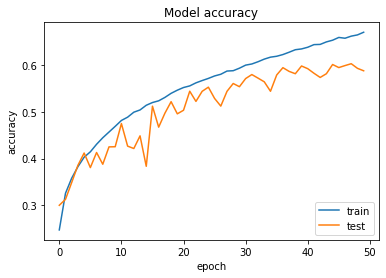

In [ ]:
# Visualize the model accuracy over time
import matplotlib.pyplot as plt
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

Results with 50 epochs and AveragePooling2D layer: 60.0% test, 68,7% train

Results with 50 epochs and MaxPool2D layer: 65.7% test, 81.9% train

MaxPool2D appears to be a better fit for this dataset, as it led to (slightly) better accuracy across both testing and training. I believe this may be due to AveragePooling2D's tendency to miss sharper features of an image. 

The testing accuracy does not seem to go beyond 65% no matter which parameters I change.